In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""Task 1: Loading and Inspecting the Data"""
# Load the audible_raw.csv file
audible = pd.read_csv("audible_raw.csv")

# View the first rows of the dataframe
audible.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [3]:
# Inspect the columns' data types
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


In [4]:
"""Task 2: Clean text data in Author and Narrator columns"""
# Remove Writtenby: from the author column
audible['author'] = audible['author'].str.replace('Writtenby:', '')
# Remove Narratedby: from the narrator column
audible['narrator'] = audible['narrator'].str.replace('Narratedby:', '')
audible[['author','narrator']]


,author,narrator
0,GeronimoStilton,BillLobely
1,RickRiordan,RobbieDaymond
2,JeffKinney,DanRussell
3,RickRiordan,SoneelaNankani
4,RickRiordan,JesseBernstein
...,...,...
87484,ChrisStewart,ChrisStewart
87485,StephenO'Shea,RobertFass
87486,MarkTwain,FloGibson
87487,LaurenceSterne,AntonLesser


In [8]:
"""Task 3: Extract number of stars and ratings from Stars column."""
# Get a glimpse of the stars column
audible.stars.sample(n=10)

48952                   Not rated yet
44161       4 out of 5 stars2 ratings
42703                   Not rated yet
65473                   Not rated yet
35269                   Not rated yet
37936                   Not rated yet
53282                   Not rated yet
68238                   Not rated yet
8349                    Not rated yet
62758    4.5 out of 5 stars33 ratings
Name: stars, dtype: object

In [9]:
# Explore the values of the star column that are not 'Not rated yet'
audible[audible.stars != 'Not rated yet'].stars.sample(n=10)

41128       5 out of 5 stars2 ratings
79168     4.5 out of 5 stars5 ratings
29401    4.5 out of 5 stars98 ratings
2268        5 out of 5 stars4 ratings
85859       4 out of 5 stars2 ratings
69605    4.5 out of 5 stars10 ratings
63696       4 out of 5 stars2 ratings
27850     4.5 out of 5 stars3 ratings
8511         5 out of 5 stars1 rating
51336    4.5 out of 5 stars14 ratings
Name: stars, dtype: object

In [10]:
# Replace 'Not rated yet' with NaN
audible.stars.replace('Not rated yet', np.nan, inplace=True)

# Extract number of stars into rating_stars and turn into float
audible['rating_stars'] = audible['stars'].str.extract('^([\d.]+)').astype(float)

# Replace the comma, extract number of ratings into n_ratings and turn into float
audible['n_ratings'] = audible['stars'].str.replace(',', '').str.extract('(\d+) rating').astype(float)

# Examine the new rating_stars and n_ratings columns
audible[['rating_stars', 'n_ratings']]


,rating_stars,n_ratings
0,5.0,34.0
1,4.5,41.0
2,4.5,38.0
3,4.5,12.0
4,4.5,181.0
...,...,...
87484,NaN,NaN
87485,NaN,NaN
87486,NaN,NaN
87487,NaN,NaN


In [11]:
# Drop the stars column
audible.drop('stars', axis=1, inplace=True)

# Check the results
audible

,name,author,narrator,time,releasedate,language,price,rating_stars,n_ratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,468.00,5.0,34.0
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,820.00,4.5,41.0
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,410.00,4.5,38.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,615.00,4.5,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,820.00,4.5,181.0
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,09-03-17,English,596.00,NaN,NaN
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,21-02-17,English,820.00,NaN,NaN
87486,The Innocents Abroad,MarkTwain,FloGibson,19 hrs and 4 mins,30-12-16,English,938.00,NaN,NaN
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,23-02-11,English,680.00,NaN,NaN


In [12]:
"""Task 4: Change data types"""

# Explore the price column
audible.price.sample(n=10)

35458      535.00
14686      569.00
6531     1,172.00
64709      100.00
77513    1,172.00
65490      505.00
36282      586.00
53027      334.00
24118      500.00
77443    1,172.00
Name: price, dtype: object

In [13]:
# Replace the comma with ''
audible['price'] = audible.price.str.replace(',', '')

# Replace 'Free' with 0
audible['price'] = audible.price.str.replace('Free', '0')

# Turn price to float
audible['price'] = audible.price.astype(float)

# Look at the unique values in the rating_stars column
audible.rating_stars.unique()

array([5. , 4.5, 4. , nan, 3.5, 3. , 1. , 2. , 2.5, 1.5])

In [14]:
"""Task 5: Extract hours and minutes from the time column"""

# Explore the values in the time column
audible.time.sample(n=10)

62200     2 hrs and 50 mins
75189     9 hrs and 35 mins
38007    31 hrs and 37 mins
12666        1 hr and 1 min
26278     8 hrs and 56 mins
37891     7 hrs and 11 mins
65121      8 hrs and 4 mins
82059     4 hrs and 10 mins
69586    11 hrs and 22 mins
43258      1 hr and 52 mins
Name: time, dtype: object

In [15]:
# Search the entries in the time column for different spellings of min. Let' try min, mins, minutes
audible.time[audible.time.str.contains('min')].sample(n=10)

6646     7 hrs and 42 mins
71354    3 hrs and 10 mins
24151    6 hrs and 14 mins
33955    9 hrs and 38 mins
4221                5 mins
33479     5 hrs and 7 mins
3358                2 mins
18335    9 hrs and 11 mins
51791    3 hrs and 55 mins
18634    9 hrs and 24 mins
Name: time, dtype: object

In [16]:
# Replace hrs, mins, and 'Less than 1 minute'
audible['time'] = audible.time.str.replace('hrs', 'hr')
audible['time'] = audible.time.str.replace('mins', 'min')
audible['time'] = audible.time.str.replace('Less than 1 minute', '1 min')

# Check the results
audible[['time']]

,time
0,2 hr and 20 min
1,13 hr and 8 min
2,2 hr and 3 min
3,11 hr and 16 min
4,10 hr
...,...
87484,7 hr and 34 min
87485,10 hr and 7 min
87486,19 hr and 4 min
87487,4 hr and 8 min


In [17]:
# Extract the number of hours, turn to integer
hours = audible['time'].str.extract('(\d+) hr').fillna(0).astype(int)

# Extract the number of minutes, turn to integer
mins = audible['time'].str.extract('(\d+) min').fillna(0).astype(int)

# Combine hours and minutes into the time_mins column
audible['time_mins'] = 60 * hours + mins

# Check the results
audible[['time_mins']]

,time_mins
0,140
1,788
2,123
3,676
4,600
...,...
87484,454
87485,607
87486,1144
87487,248


In [18]:
# Drop the time column
audible.drop(columns=['time'], axis=1, inplace=True)

# Inspect the dataframe
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          87489 non-null  object 
 1   author        87489 non-null  object 
 2   narrator      87489 non-null  object 
 3   releasedate   87489 non-null  object 
 4   language      87489 non-null  object 
 5   price         87489 non-null  float64
 6   rating_stars  15072 non-null  float64
 7   n_ratings     15072 non-null  float64
 8   time_mins     87489 non-null  int32  
dtypes: float64(3), int32(1), object(5)
memory usage: 5.7+ MB


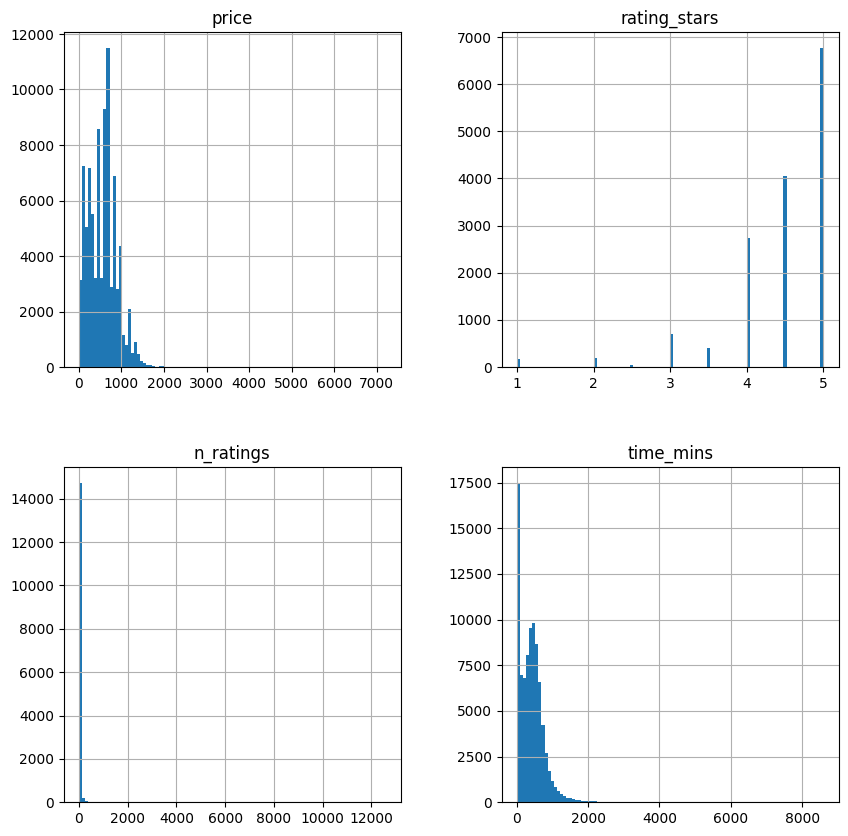

In [19]:
"""Task 6: Check data ranges"""

# Plot histograms of all the numerical columns
audible.hist(figsize=(10,10), bins=100)
plt.show()

In [20]:
# Look at the numeric columns
audible.describe()

,price,rating_stars,n_ratings,time_mins
count,87489.000000,15072.00000,15072.000000,87489.000000
mean,559.009246,4.45694,21.613190,417.497663
std,336.096642,0.72394,207.479634,364.559399
min,0.000000,1.00000,1.000000,1.000000
25%,268.000000,4.00000,1.000000,142.000000
50%,585.000000,4.50000,2.000000,386.000000
75%,755.000000,5.00000,7.000000,584.000000
max,7198.000000,5.00000,12573.000000,8595.000000


In [21]:
# Look at the non numeric columns
audible.describe(exclude=[np.number])

,name,author,narrator,releasedate,language
count,87489,87489,87489,87489,87489
unique,82767,48374,29717,5058,36
top,The Art of War,"矢島雅弘,石橋遊",anonymous,16-05-18,English
freq,20,874,1034,773,61884


In [22]:
# Transform prices to USD (multiply times 0.012)
audible['price'] = audible.price * .012

# Check the results
audible['price'].describe()

count    87489.000000
mean         6.708111
std          4.033160
min          0.000000
25%          3.216000
50%          7.020000
75%          9.060000
max         86.376000
Name: price, dtype: float64

In [23]:
# Inspect the language column before making changes
audible.language.unique()

array(['English', 'Hindi', 'spanish', 'german', 'french', 'catalan',
       'swedish', 'italian', 'danish', 'finnish', 'dutch', 'hebrew',
       'russian', 'polish', 'galician', 'afrikaans', 'icelandic',
       'romanian', 'japanese', 'tamil', 'portuguese', 'urdu', 'hungarian',
       'czech', 'bulgarian', 'mandarin_chinese', 'basque', 'korean',
       'arabic', 'greek', 'turkish', 'ukrainian', 'slovene', 'norwegian',
       'telugu', 'lithuanian'], dtype=object)

In [24]:
# Update capitalization in the language column
audible['language'] = audible.language.str.capitalize()

# Check the results
audible.language.unique()

array(['English', 'Hindi', 'Spanish', 'German', 'French', 'Catalan',
       'Swedish', 'Italian', 'Danish', 'Finnish', 'Dutch', 'Hebrew',
       'Russian', 'Polish', 'Galician', 'Afrikaans', 'Icelandic',
       'Romanian', 'Japanese', 'Tamil', 'Portuguese', 'Urdu', 'Hungarian',
       'Czech', 'Bulgarian', 'Mandarin_chinese', 'Basque', 'Korean',
       'Arabic', 'Greek', 'Turkish', 'Ukrainian', 'Slovene', 'Norwegian',
       'Telugu', 'Lithuanian'], dtype=object)

In [25]:
"""Task 7: Checking for duplicates"""

# Look for duplicate rows
audible.duplicated().sum()

0

In [26]:
# Create a list of our subset columns and assign to subset_cols
subset_cols=['name', 'author', 'narrator', 'time_mins', 'price']

# Check for duplicates using our subset of columns
audible.duplicated(subset=subset_cols).sum()

70

In [27]:
# Check the duplicated rows keeping the duplicates and order by the name column
audible[audible.duplicated(subset=subset_cols, keep=False)].sort_values(by=['name'])

,name,author,narrator,releasedate,language,price,rating_stars,n_ratings,time_mins
63978,"""Das Böse ist des Menschen beste Kraft""",ChristianLiederer,ThomasKrause,14-12-21,German,2.796,NaN,NaN,144
63965,"""Das Böse ist des Menschen beste Kraft""",ChristianLiederer,ThomasKrause,23-12-21,German,2.796,NaN,NaN,144
24625,90 Minutes in Heaven,"DonPiper,CecilMurphey",DonPiper,25-09-15,English,7.032,NaN,NaN,495
24116,90 Minutes in Heaven,"DonPiper,CecilMurphey",DonPiper,15-10-20,English,7.032,NaN,NaN,495
16971,Adagio in Dm,BillBrown,BillBrown,06-08-21,English,5.472,NaN,NaN,78
...,...,...,...,...,...,...,...,...,...
18338,What I Talk About When I Talk About Running,HarukiMurakami,RayPorter,07-07-16,English,4.776,4.5,193.0,263
38021,When Women Ruled the World,KaraCooney,KaraCooney,30-11-18,English,10.032,4.5,14.0,555
20260,When Women Ruled the World,KaraCooney,KaraCooney,30-11-18,English,10.032,4.5,13.0,555
22158,Wings of Fire,"APJAbdulKalam,ArunTiwari",GirishKarnad,01-04-20,English,0.900,5.0,1823.0,75


In [28]:
# Drop duplicated rows keeping the last release date (because the release date is already in the increasing order,
# which means last occurrence is the latest record
audible.drop_duplicates(subset=subset_cols, keep='last', inplace=True)

# Check again for duplicates using our subset of columns
audible.duplicated(subset=subset_cols).sum()

0

In [29]:
"""Task 8: Dealing with missing data"""
# Check for null values
audible.isna().sum()
# We don't handle null values here because there are too much of them, so it can result in bias for analysis.


name                0
author              0
narrator            0
releasedate         0
language            0
price               0
rating_stars    72387
n_ratings       72387
time_mins           0
dtype: int64

In [30]:
"""Task 9: Save the cleaned data set"""
# Save the dataframe to a new file: 'audible_clean.csv'
audible.to_csv('audible_clean.csv', index=False)